# **Random Forest Classification**

In [1]:
# Import data

import pandas as pd
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv("preprocessed_data.csv")

In [2]:
# train test splitting

data['gender'] = data['gender'].map({'M':0,'F':1})

X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# check data balance

y_train.value_counts()

C    2661
A    2658
B    2657
D    2208
Name: class, dtype: int64

In [3]:
# train model

rf = RandomForestClassifier(n_estimators = 800)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=800)

In [4]:
# prediction

y_pred = rf.predict(X_test)

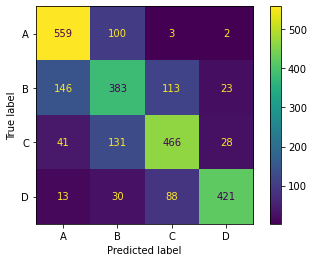

In [5]:
# confusion matrix

class_name = ['A','B','C','D']

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name).plot()

In [6]:
# Evaluation

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.74      0.84      0.79       664
           B       0.59      0.58      0.59       665
           C       0.70      0.70      0.70       666
           D       0.89      0.76      0.82       552

    accuracy                           0.72      2547
   macro avg       0.73      0.72      0.72      2547
weighted avg       0.72      0.72      0.72      2547



# ===================

ลอง hyperparameter tuning เฉยๆ

In [7]:
# # Test find the best parameter

# from random import randint

param_dist = {'n_estimators': randint(200,1000),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 932}


In [ ]:
rf = RandomForestClassifier(n_estimators = 932, max_depth=15)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=932)

In [ ]:
# prediction

y_pred = rf.predict(X_test)

In [ ]:
# Evaluation

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.72      0.83      0.77       665
           B       0.59      0.58      0.58       666
           C       0.69      0.68      0.69       667
           D       0.89      0.79      0.84       666

    accuracy                           0.72      2664
   macro avg       0.72      0.72      0.72      2664
weighted avg       0.72      0.72      0.72      2664

